<a href="https://colab.research.google.com/github/llll121/Introduction-to-ML/blob/main/Week6Homework_Elbow_methond_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Elbow method

### Import data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Feature scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

iris_df = scaler.fit_transform(iris_df)
iris_df_scaling = pd.DataFrame(iris_df, columns=iris.feature_names)
iris_df_scaling

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


### K-Means

In [4]:
from sklearn.cluster import KMeans
sse = []    # SSE 就是variance
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_df_scaling)
    sse.append(km.inertia_)

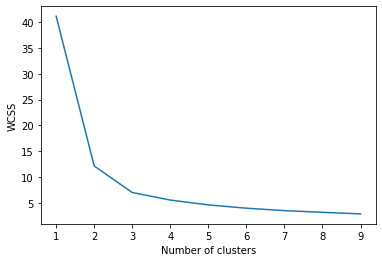

In [5]:
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(k_rng,sse)

# 2. PCA dimensional reduction

In [6]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784')

In [7]:
mnist.data.shape

(70000, 784)

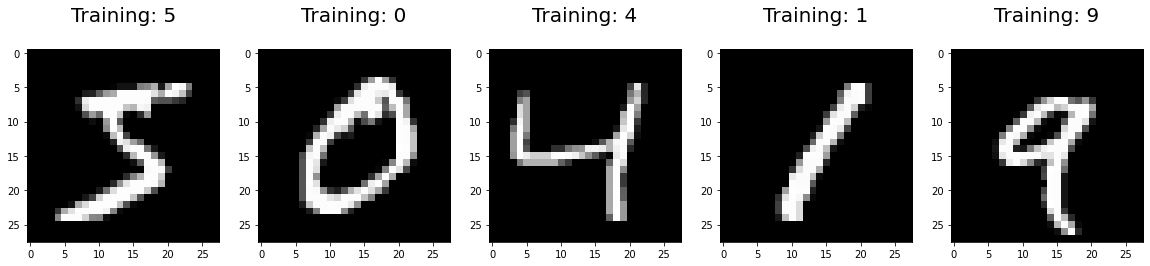

In [8]:
plt.figure(figsize=(20.,4))
for index, (image, label) in enumerate(zip(np.array(mnist.data.iloc[0:5,:]), mnist.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(int(label)), fontsize=20)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#### split dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.25, random_state=2)

#### feature scaling

In [11]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
X_train.shape

(52500, 784)

In [14]:
X_train_pca.shape

(52500, 182)

#### original dataset training

In [15]:
%%time
LR = LogisticRegression()
LR.fit(X_train, y_train)
score = LR.score(X_test, y_test)

CPU times: user 1min 3s, sys: 6.37 s, total: 1min 9s
Wall time: 35.9 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [16]:
score

0.9148

#### pca dataset training

In [17]:
%%time
LR_pca = LogisticRegression()
LR_pca.fit(X_train_pca, y_train)
score = LR_pca.score(X_test_pca, y_test)

CPU times: user 18.5 s, sys: 5.77 s, total: 24.2 s
Wall time: 12.6 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
score

0.9225142857142857